# Lab | Matplotlib & Seaborn

#### Import all the libraries that are necessary.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Challenge 1

#### Data

In [11]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots.

Also, play around with the linewidth and style. Use the ones you're most happy with.

<Figure size 2160x864 with 0 Axes>

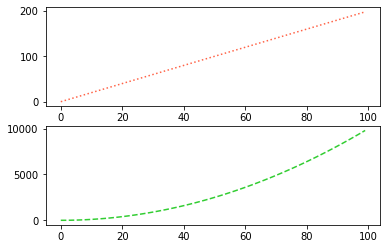

In [36]:
#example code
#fig, axs = plt.subplots(nrows = 1, ncols = 2)
#fig.suptitle('Horizontally stacked subplots')
#axs[0].plot(x, y)
#ax[1].plot(x, -y)

# OPTION 1
# Create a figure of a fixed size
plt.figure(figsize=(17,6))

# First plot
plt.subplot, charts = plt.subplots(2,1)
charts[0].plot(x,y, color='tomato', linewidth = 1.5, linestyle='dotted')

# Second plot
charts[1].plot(x,z, color='limegreen', linewidth = 1.5, linestyle='dashed')

# Show the plot
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

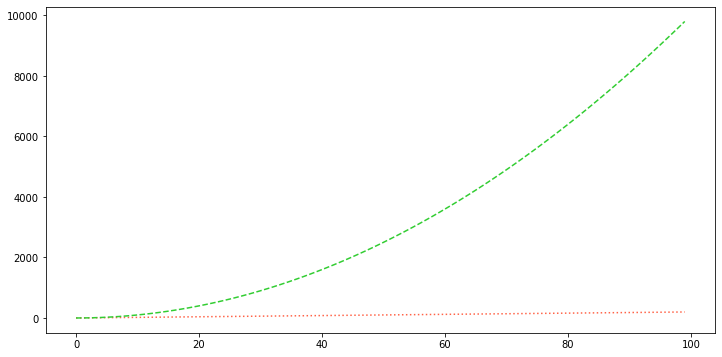

In [39]:
# OPTION 2

# Create a figure of a fixed size and axes
plt.figure(figsize=(12,6))

# First plot
plt.plot(x,y, color='tomato', linewidth = 1.5, linestyle='dotted')

# Plots
plt.plot(x,z, color='limegreen', linewidth = 1.5, linestyle='dashed')

# Show the plot
plt.show()

#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

<Figure size 432x288 with 0 Axes>

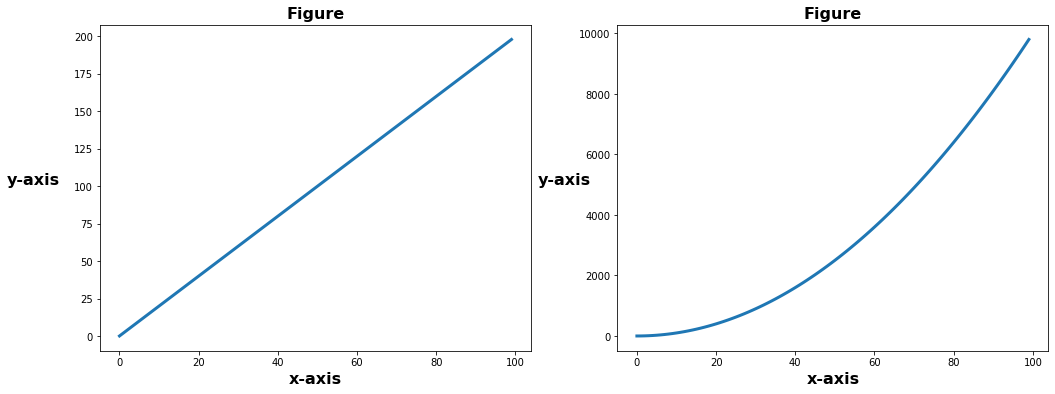

In [56]:
# ENHANCED VERSION to see more matplotlib features

#example code
#fig, axs = plt.subplots(nrows = 1, ncols = 2)
#fig.suptitle('Horizontally stacked subplots')
#axs[0].plot(x, y)
#ax[1].plot(x, -y)

# Variables
fs = 16 # fontsize
fw = 700 # fontweight
lw = 3 # lineweight
y_rot = 0 # ylabel rotation

# Create a figure of a fixed size and axes
plt.figure()
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(17,6))
ax1.plot(x,y)
ax2.plot(x,z)
plt.rc('lines', linewidth=lw)

#matplotlibrc configuration files are used to customize all kinds of properties in matplotlib
#that one can dynamically change the default rc settings to customize the default parameters

# First plot adding a title and x and y labels
ax1.set_title("Figure", fontsize=fs, fontweight = fw)
ax1.set_xlabel("x-axis", fontsize=fs, fontweight = fw)
ax1.set_ylabel("y-axis", fontsize=fs, fontweight = fw, rotation = 0, labelpad = 40)

# Second plot adding a title and x and y labels
ax2.set_title("Figure", fontsize=fs, fontweight = fw)
ax2.set_xlabel("x-axis", fontsize=fs, fontweight = fw)
ax2.set_ylabel("y-axis", fontsize=fs, fontweight = fw, rotation = 0, labelpad = 15)

# Show the plot
plt.show()

#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

<Figure size 432x288 with 0 Axes>

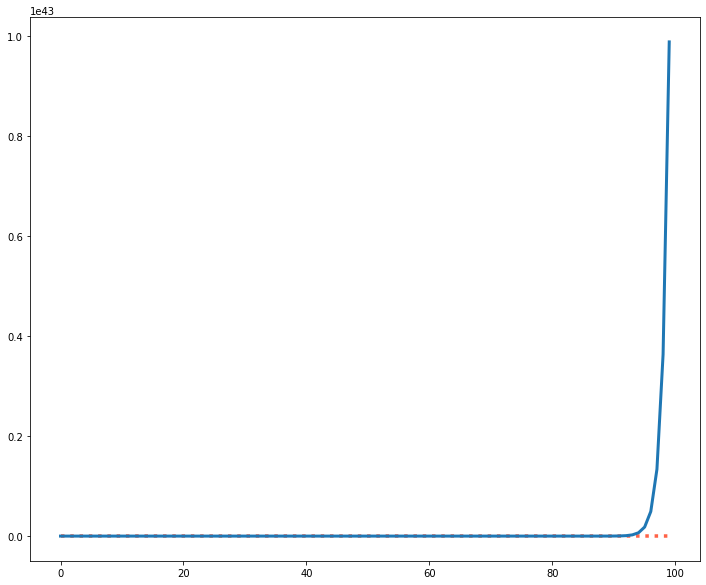

<Figure size 432x288 with 0 Axes>

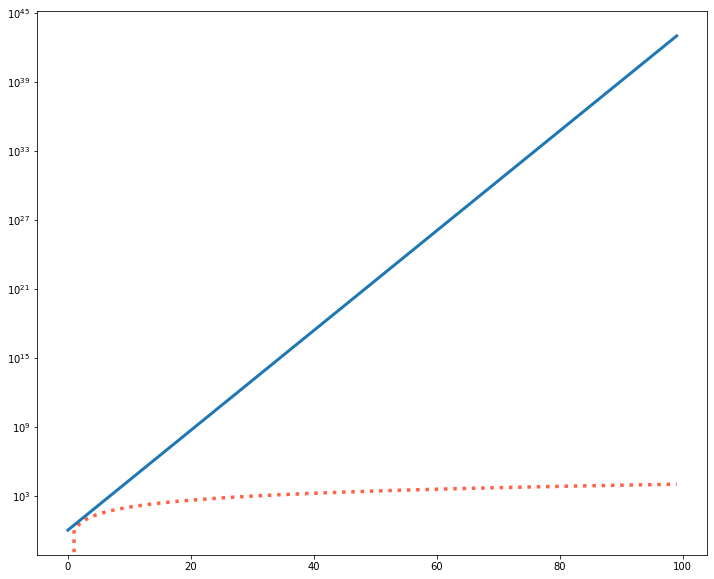

In [86]:
# Create a figure of a fixed size and axes
plt.figure()
fig, ax = plt.subplots(figsize = (12,10))

y1 = x**2
y2 = np.exp(x)

# Normal plot
ax.plot(x, y1, color='tomato', linewidth = 3.5, linestyle='dotted')
ax.plot(x, y2)
plt.show()

# Logarithmic scale
plt.figure()
fig, ax = plt.subplots(figsize = (12,10))
ax.plot(x, y1, color='tomato', linewidth = 3.5, linestyle='dotted')
ax.plot(x, y2)
plt.yscale("log")

# Show plot
plt.show()

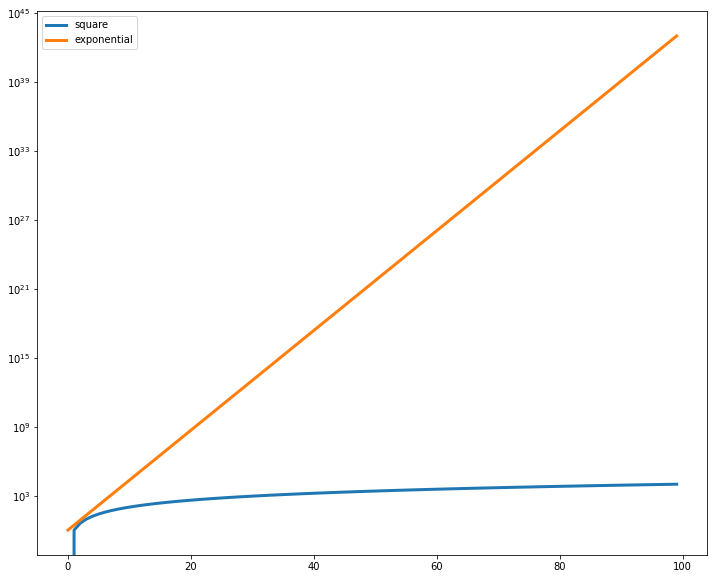

In [66]:
# ALTERNATIVE WITH LEGEND

# Create a figure of a fixed size and axes
plt.figure(figsize = (12,10))

y1 = x**2
y2 = np.exp(x)

# Normal plot
plt.plot(x, y1, label = 'square')
plt.plot(x, y2, label = 'exponential')

# Logarithmic scale
plt.yscale("log")

# Show plot
plt.legend()
plt.show()

# Challenge 2

Import the Fitbit2.csv file and name your dataset fitbit. Download the data from [here](https://drive.google.com/file/d/17TW-w-izKuR7bLoa0Mnyp9YN9zEQNXq-/view?usp=sharing) and place it in the data folder. Access it through a relative path.

In [80]:
data = pd.read_csv('data/Fitbit2.csv')
print(data.head())
print('\n')
print(data.shape)
print('\n')
print(data.tail())
print('\n')
data.info()

         Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0  2015-05-08            1934    905      0.65       0              1.355   
1  2015-05-09            3631  18925     14.11       4            611.000   
2  2015-05-10            3204  14228     10.57       1            602.000   
3  2015-05-11            2673   6756      5.02       8            749.000   
4  2015-05-12            2495    502      3.73       1            876.000   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                      46                      0                    0   
1                     316                     61                   60   
2                     226                     14                   77   
3                     190                     23                    4   
4                     171                      0                    0   

   Activity Calories  ...  Distance_miles      Days  Days_encoded  \
0               1680  ...    

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month.
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.

Hints:

- Use Months_encoded and Week_or Weekend columns.
- Use matplolib.pyplot object oriented API.
- Set your size figure to 12,4
- Explore plt.sca
- Explore plt.xticks
- Save your figures

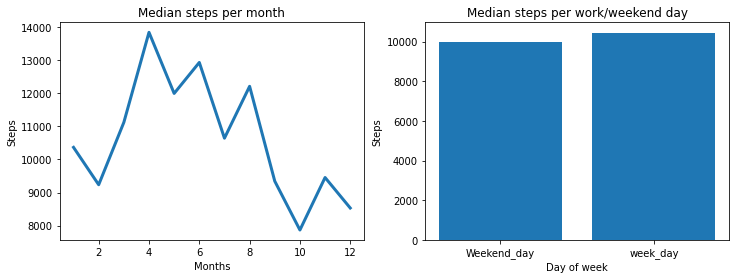

<Figure size 432x288 with 0 Axes>

In [126]:
# MEDIAN STEPS BY MONTH_ENCODED
# Find the median steps for each month
steps = data.Steps.groupby(data.Months_encoded).median().reset_index()
x = steps['Months_encoded']
y = steps['Steps']

# Create a figure of a fixed size and axes
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

# Set the current axes instance to ax[0] - Now plt methods will affect ax[0]
plt.sca(axs[0])

# Plot the weekday steps in the current axes
plt.plot(x,y)

# Add labels, title, etc
plt.xlabel('Months')
plt.ylabel('Steps')
plt.title('Median steps per month')

# Save the figure
plt.savefig('Median_steps_per_month.png') 

# MEDIAN STEPS BY WORK_OR_WEEKEND
# Set the current axes instance to ax[1] - Now plt methods will affect ax[1]
plt.sca(axs[1])

# Find the median steps for workdays and weekdays
steps2 = data.Steps.groupby(data.Work_or_Weekend).median().reset_index()
steps_workdays = steps2['Work_or_Weekend']
steps_weekend = steps2['Steps']

# Plot the workday and weekend steps in the current axes
plt.bar(steps_workdays, steps_weekend)
axs[1].set_xticks([0,1])
axs[1].set_xticklabels(['Weekend_day','week_day'])

# Add labels, title, etc
plt.xlabel('Day of week')
plt.ylabel('Steps')
plt.title('Median steps per work/weekend day')
plt.show()

# Save the figure
plt.savefig('Median_steps_per_week.png') 

#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

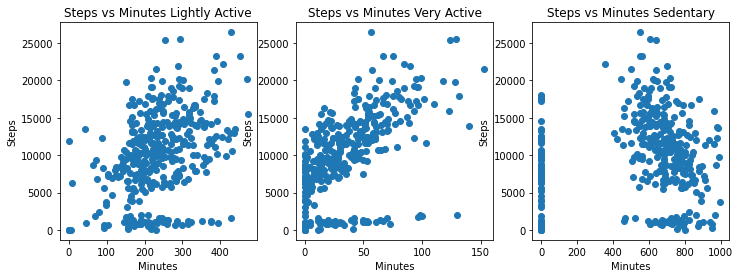

In [130]:
# ALTERNATIVE 1
# Create a df with the columns we are interested in 
df = data[['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary', 'Steps']] 
df

# Create a figure of a fixed size and axes
fig, ax = plt.subplots(nrows = 1 , ncols = 3,figsize = (12,4))

x = data['Steps']
y = data[['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']]

# Iterate to draw each scatter plot
columns = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for i, column in enumerate(columns):
    plt.sca(ax[i])
    plt.scatter(df[column], df['Steps'])
    plt.xlabel('Minutes')
    plt.ylabel('Steps')
    plt.title('Steps vs ' + column)

plt.show()

Text(0, 0.5, 'Steps vs minutes')

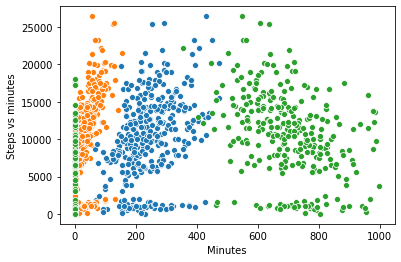

In [136]:
# ALTERNATIVE 2
# Create a df with the columns we are interested in 
# SAME AS ABOVE

#I have not used seaborn yet, so it is time :)

# Create a figure of a fixed size and axes
# Iterate to draw each scatter plot

for column in columns:
    sns.scatterplot(x = column, y = 'Steps', data = data)

plt.xlabel("Minutes")
plt.ylabel("Steps")
plt.ylabel("Steps vs minutes")
